# Insurance Charges Prediction

## Introduction
This notebook explores the insurance dataset to build and evaluate different regression models. The dataset includes information such as age, sex, BMI, number of children, smoking status, and region, with the goal of predicting insurance charges.

In [1]:
import pandas as pd
import numpy as np

## Data Description
The dataset consists of the following features:
- **age**: Age of the insured individual.
- **sex**: Gender of the insured (Male/Female).
- **bmi**: Body Mass Index of the insured.
- **children**: Number of children/dependents covered by the insurance.
- **smoker**: Whether the insured is a smoker (Yes/No).
- **region**: Geographical region of the insured (Northwest, Southeast, Southwest, or Northeast).
- **charges**: Insurance charges billed to the individual.

The dataset is analyzed to understand the relationships between these features and the insurance charges.

In [2]:
df = pd.read_csv('/content/insurance.csv')
#df = pd.read_csv('/kaggle/input/ushealthinsurancedataset/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)
In this section, we perform exploratory data analysis to understand the dataset better. We will:
- Check for missing values.
- Visualize the distribution of numerical features.
- Analyze correlations between numerical features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Feature Distributions

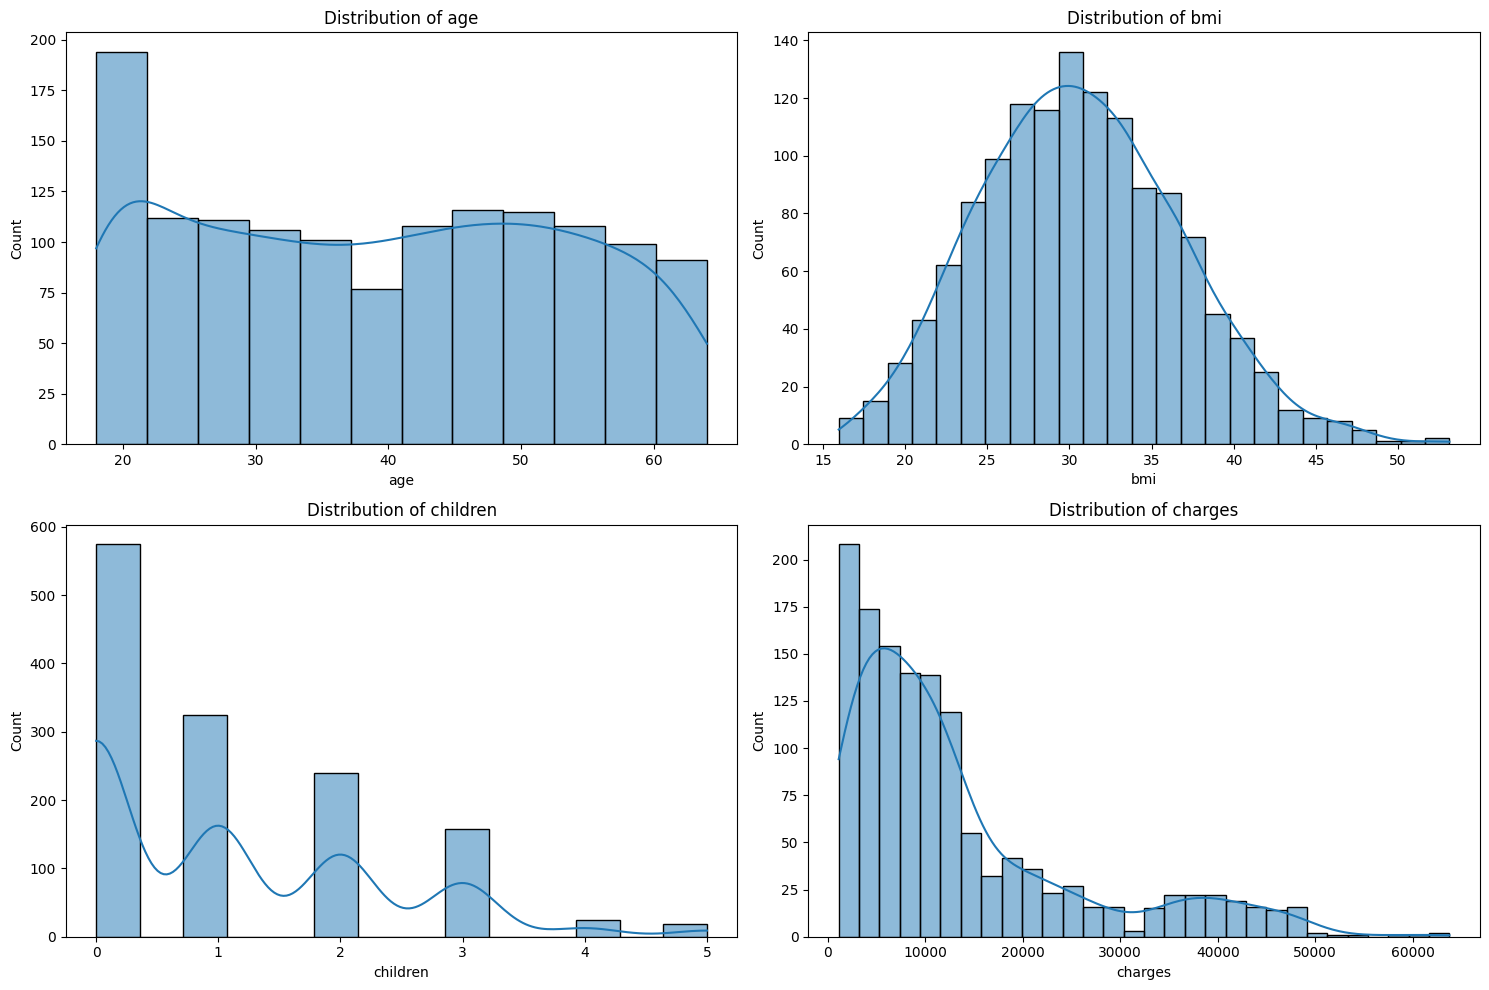

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(['age', 'bmi', 'children', 'charges']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

### Correlation Matrix
We visualize the correlation matrix to understand the relationships between numerical features.

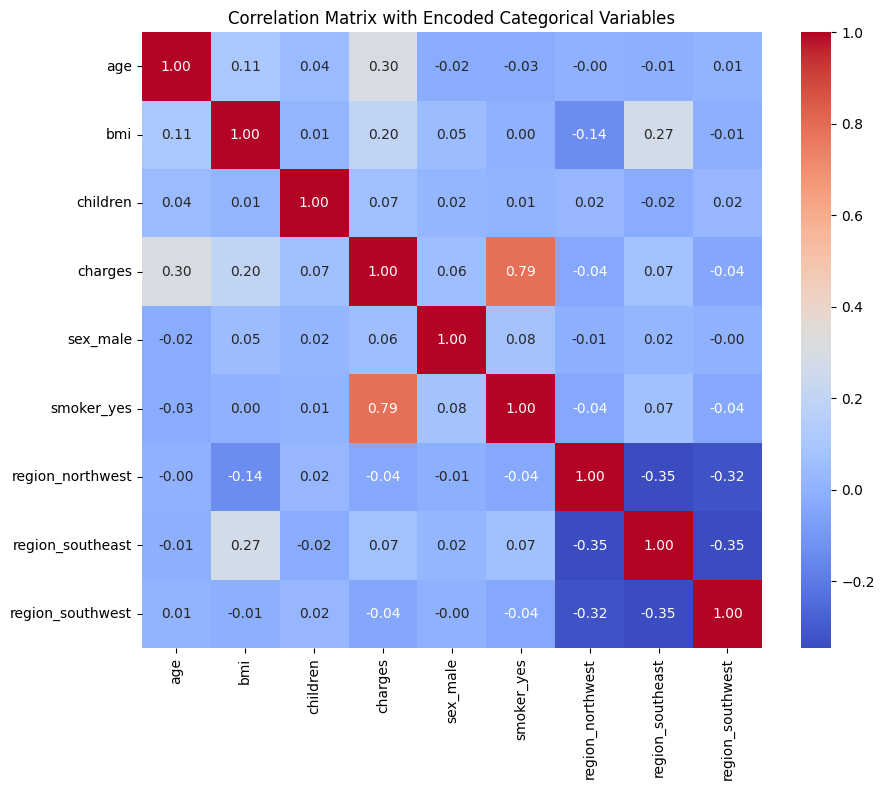

In [8]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

corr = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Encoded Categorical Variables')
plt.show()

### Pairwise Plots for Features:

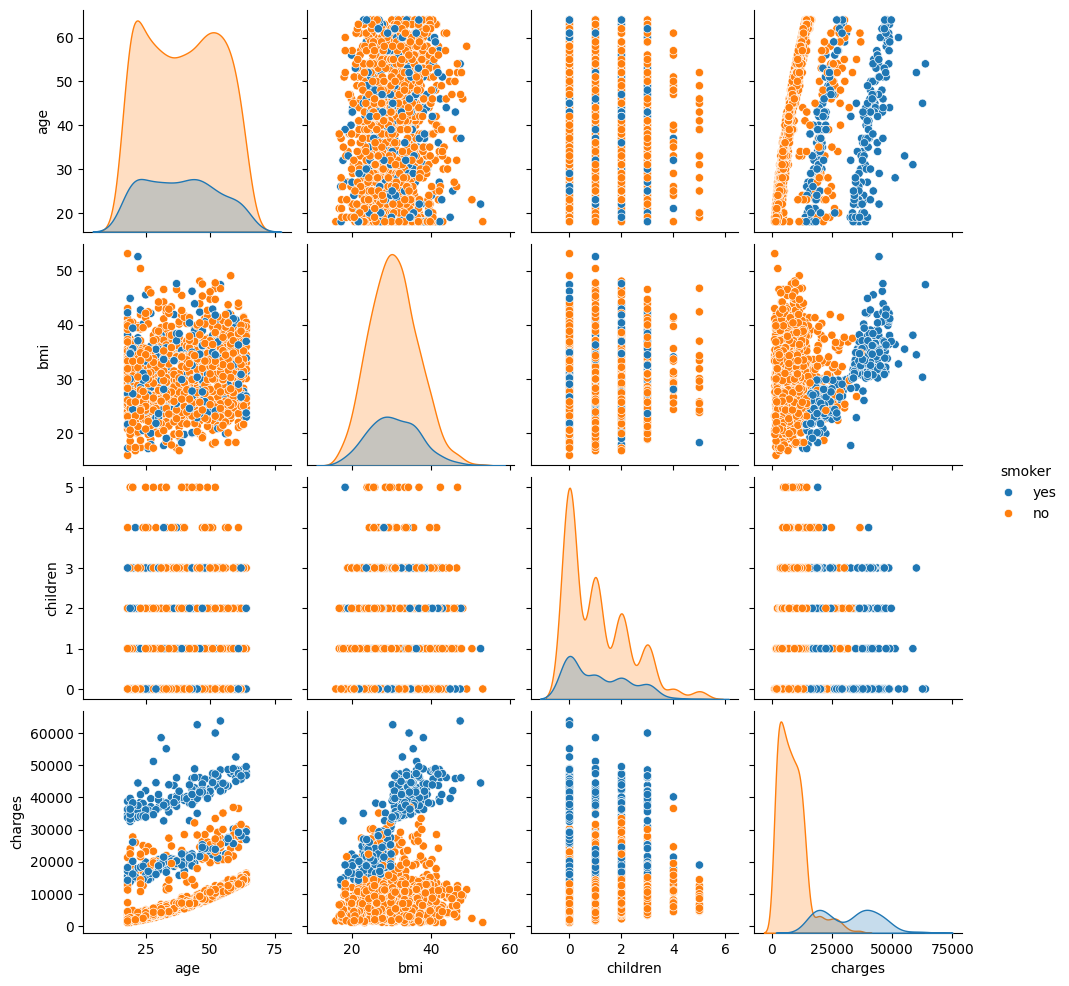

In [9]:
sns.pairplot(df, hue='smoker')
plt.show()

## Data Preprocessing
Before building the models, we need to preprocess the data. This involves:
- Encoding categorical variables.
- Scaling numerical features.

### Encoding Categorical Variables


In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#### Define the preprocessing steps

In [11]:
X = df.drop('charges', axis=1)
y = df['charges']

categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building and Evaluation
We build and evaluate different regression models to predict insurance charges. The models include Linear Regression, Polynomial Regression, and K-Nearest Neighbors

### Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

linear_reg_pipeline.fit(X_train, y_train)

pred_linear_reg = linear_reg_pipeline.predict(X_test)

#### Evaluate the model

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, pred_linear_reg)
mae = mean_absolute_error(y_test, pred_linear_reg)
r2score = r2_score(y_test, pred_linear_reg)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R squared: {r2score}")

Mean Squared Error: 33596915.85136146
Mean Absolute Error: 4181.194473753649
R squared: 0.7835929767120723


#### Visualization

<ipython-input-14-3370de412a63>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


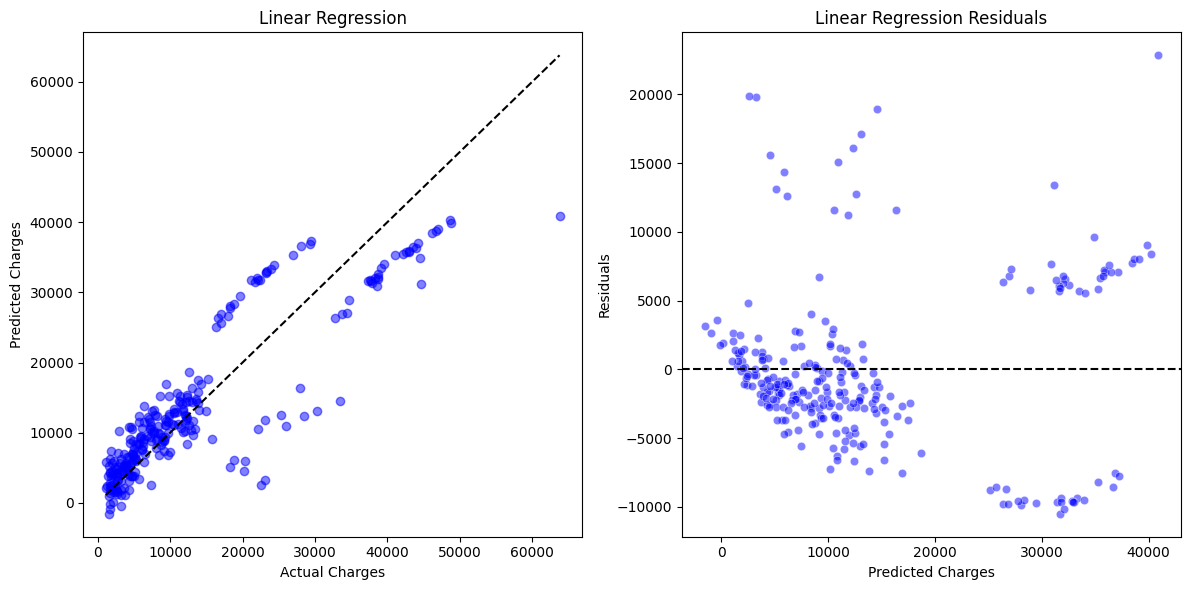

In [14]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, pred_linear_reg, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=pred_linear_reg, y=y_test - pred_linear_reg, color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

plt.tight_layout()
plt.show()

### Polynomial Regression

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

poly_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

param_grid_poly = {
    'poly__degree': [2, 3, 4],
    'poly__include_bias': [True, False],
    'model__fit_intercept': [True, False]
}

grid_search_poly = GridSearchCV(poly_reg_pipeline, param_grid_poly, cv=5, scoring='neg_mean_squared_error', n_jobs = -1)

grid_search_poly.fit(X_train, y_train)

best_poly_model = grid_search_poly.best_estimator_
poly_predictions = best_poly_model.predict(X_test)

#### Evaluating the results

In [16]:
mse_poly = mean_squared_error(y_test, poly_predictions)
mae_poly = mean_absolute_error(y_test, poly_predictions)
r2_poly = r2_score(y_test, poly_predictions)

print(f"Best Polynomial Regression Model Parameters: {grid_search_poly.best_params_}")
print(f"Best Score for Polynomial Regression: {-grid_search_poly.best_score_}")
print(f"Mean Squared Error: {mse_poly}")
print(f"Mean Absolute Error: {mae_poly}")
print(f"R squared: {r2_poly}")

Best Polynomial Regression Model Parameters: {'model__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': True}
Best Score for Polynomial Regression: 24447087.440964468
Mean Squared Error: 20712805.987918362
Mean Absolute Error: 2729.5001336394453
R squared: 0.8665830903164841


#### Visualization

<ipython-input-17-1119b684e372>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


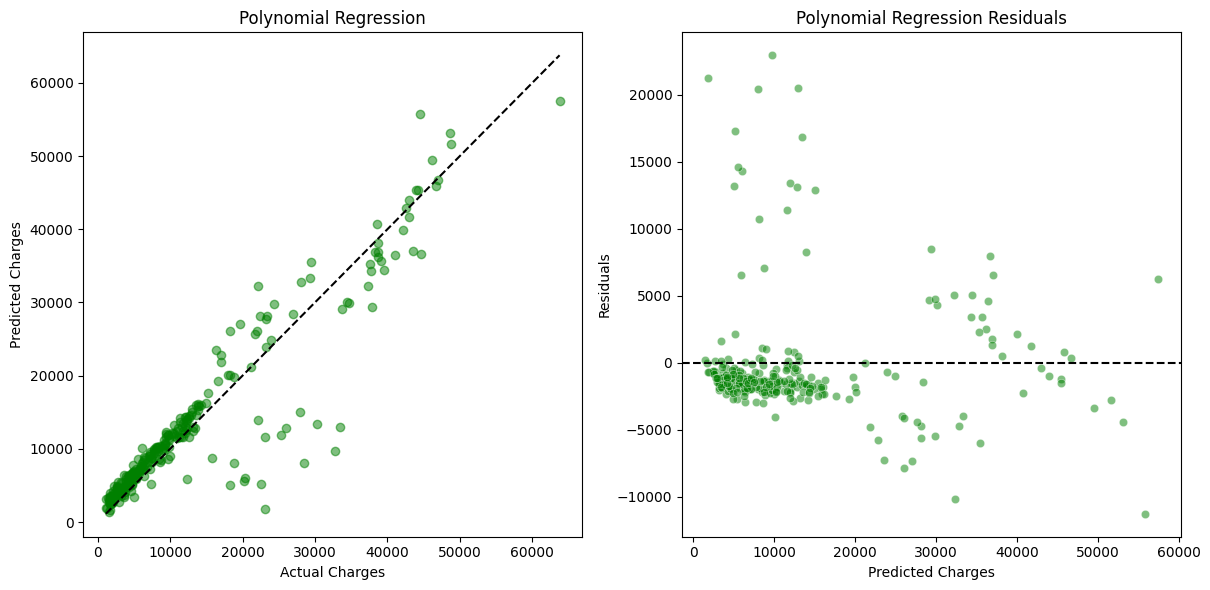

In [17]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, poly_predictions, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Polynomial Regression')

plt.subplot(1, 3, 2)
sns.scatterplot(x=poly_predictions, y=y_test - poly_predictions, color='green', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Polynomial Regression Residuals')

plt.tight_layout()
plt.show()

### K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsRegressor

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor())
])

param_grid_knn = {
    'model__n_neighbors': [2, 3, 4, 5, 6, 7],
    'model__metric': ['euclidean', 'manhattan'],
    'model__weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs = -1)

grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
knn_predictions = best_knn_model.predict(X_test)

#### Evaluating the results

In [19]:
mse_poly = mean_squared_error(y_test, knn_predictions)
mae_poly = mean_absolute_error(y_test, knn_predictions)
r2_poly = r2_score(y_test, knn_predictions)

print(f"Best Polynomial Regression Model Parameters: {grid_search_knn.best_params_}")
print(f"Best Score for Polynomial Regression: {-grid_search_knn.best_score_}")
print(f"Mean Squared Error: {mse_poly}")
print(f"Mean Absolute Error: {mae_poly}")
print(f"R squared: {r2_poly}")

Best Polynomial Regression Model Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
Best Score for Polynomial Regression: 40301203.76414652
Mean Squared Error: 37984876.27096501
Mean Absolute Error: 3618.18750980737
R squared: 0.7553289105426424


#### Visualization

<ipython-input-20-7858dfcce993>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


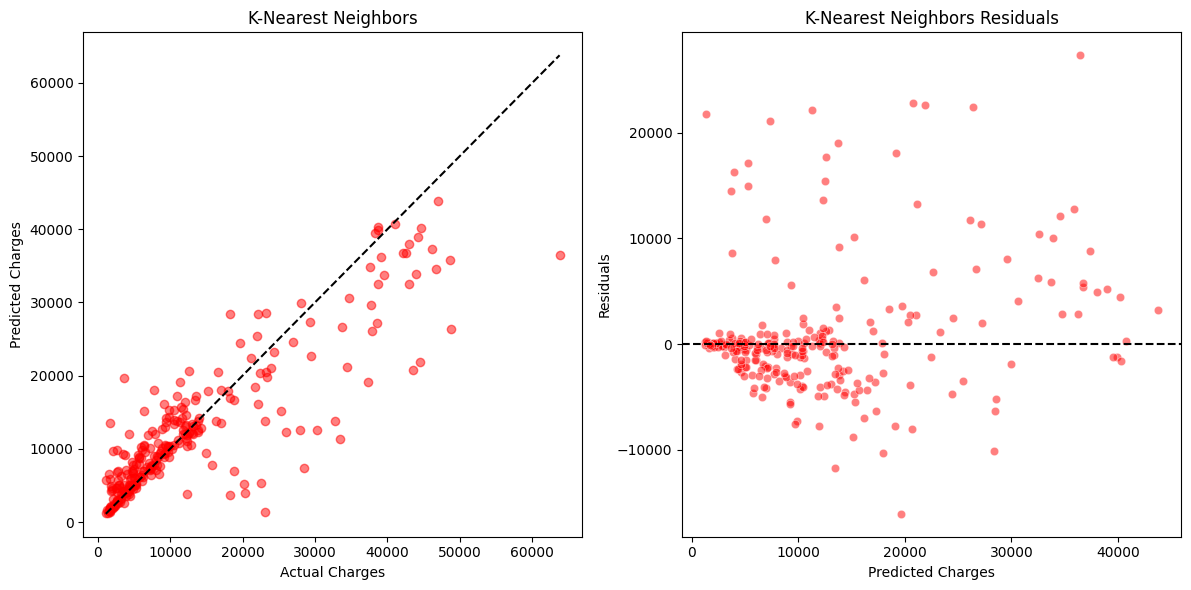

In [20]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test, knn_predictions, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('K-Nearest Neighbors')

plt.subplot(1, 3, 2)
sns.scatterplot(x=knn_predictions, y=y_test - knn_predictions, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('K-Nearest Neighbors Residuals')

plt.tight_layout()
plt.show()

### Model Performance Analysis
The dataset consists of 1,338 entries with features including age, sex, BMI, number of children, smoker status, region, and insurance charges. The analysis compares three regression models: Linear Regression, Polynomial Regression, and K-Nearest Neighbors (KNN).

#### Linear Regression

- Mean Squared Error (MSE): 33,596,915.85
- Mean Absolute Error (MAE): 4,181.19
- R-squared (R²): 0.78

Linear Regression shows a moderate performance with an R-squared value of 0.78, indicating that approximately 78% of the variance in insurance charges is explained by the model. The high MSE and MAE suggest that while the model captures a substantial amount of variance, there is room for improvement in prediction accuracy.

#### Polynomial Regression

- Best Model Parameters: {'model__fit_intercept': True, 'poly__degree': 2, 'poly__include_bias': True}
- Best Score: 24,447,087.44
- Mean Squared Error (MSE): 20,712,805.99
- Mean Absolute Error (MAE): 2,729.50
- R-squared (R²): 0.87

Polynomial Regression performs the best among the three models. With an R-squared value of 0.87, it explains approximately 87% of the variance in insurance charges. The lower MSE and MAE indicate a better fit and more accurate predictions compared to Linear Regression. The polynomial model effectively captures the non-linear relationships in the data.

#### K-Nearest Neighbors (KNN)
- Best Model Parameters: {'model__metric': 'manhattan', 'model__n_neighbors': 5, 'model__weights': 'distance'}
- Best Score: 40,301,203.76
- Mean Squared Error (MSE): 37,984,876.27
- Mean Absolute Error (MAE): 3,618.19
- R-squared (R²): 0.76

KNN shows moderate performance with an R-squared value of 0.76. While it performs reasonably well, its MSE and MAE are higher compared to Polynomial Regression. This suggests that KNN may not capture the data's complexity as effectively as the polynomial model but still provides a reasonable fit.

#### Summary

- Polynomial Regression offers the best performance in terms of fitting the data and making accurate predictions, with the lowest MSE and MAE and the highest R-squared value.
- Linear Regression is a good baseline model but underperforms compared to Polynomial Regression.
- KNN provides decent predictions but does not match the accuracy of Polynomial Regression.

#### Visualizations

<ipython-input-21-ccaff8128794>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-21-ccaff8128794>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
<ipython-input-21-ccaff8128794>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')


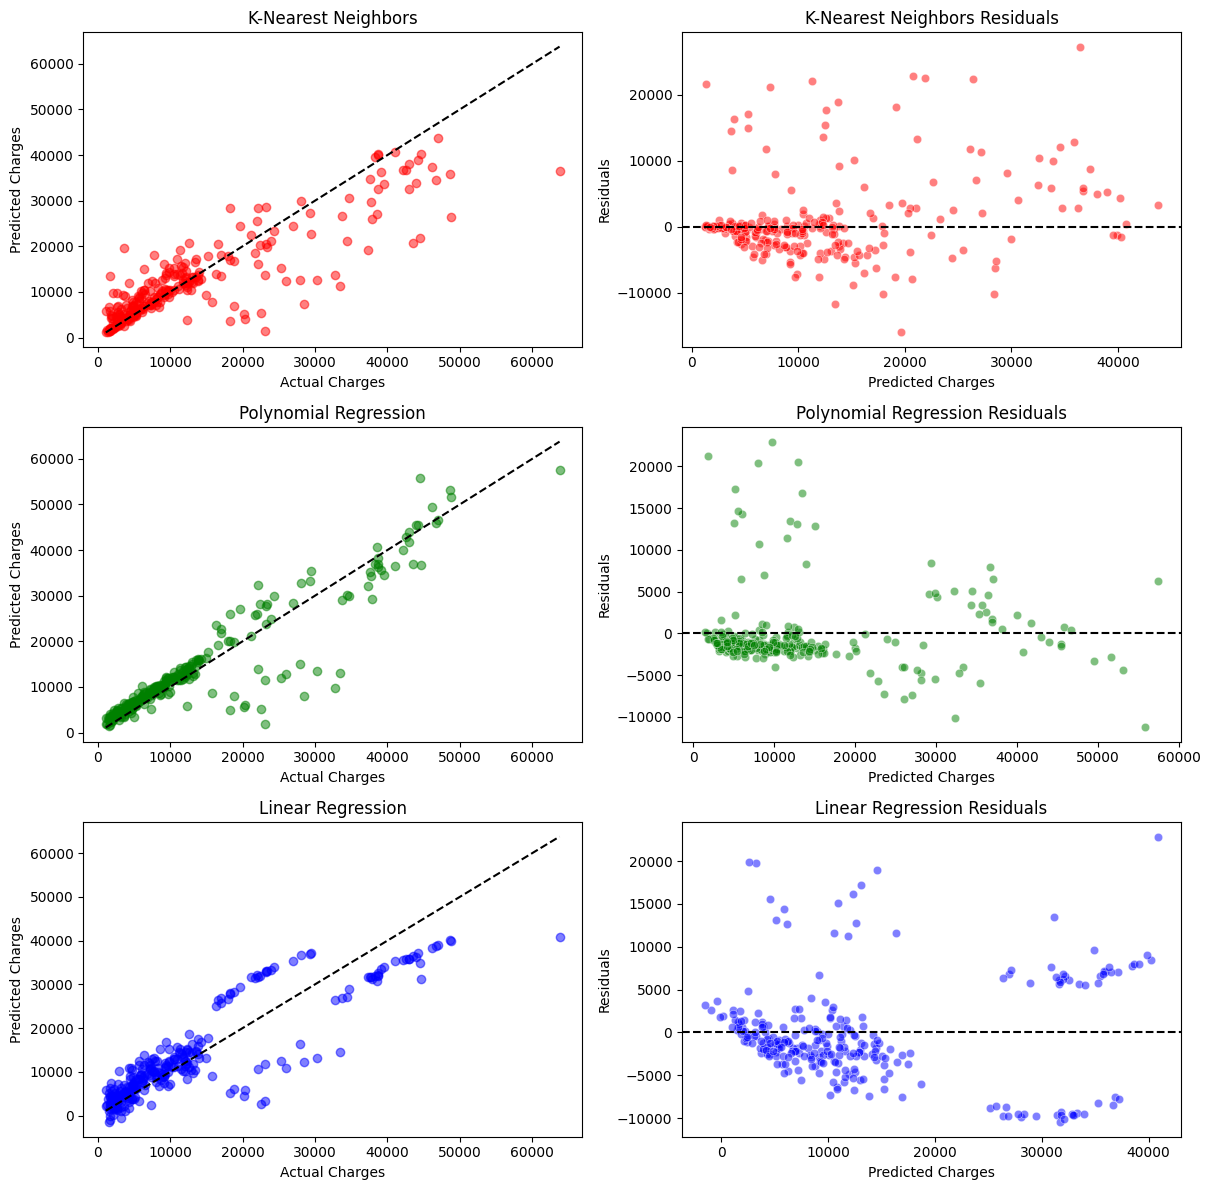

In [21]:
plt.figure(figsize=(18, 12))

# K-Nearest Neighbors (KNN) Plots
plt.subplot(3, 3, 1)
plt.scatter(y_test, knn_predictions, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('K-Nearest Neighbors')

plt.subplot(3, 3, 2)
sns.scatterplot(x=knn_predictions, y=y_test - knn_predictions, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('K-Nearest Neighbors Residuals')

# Polynomial Regression Plots
plt.subplot(3, 3, 4)
plt.scatter(y_test, poly_predictions, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Polynomial Regression')

plt.subplot(3, 3, 5)
sns.scatterplot(x=poly_predictions, y=y_test - poly_predictions, color='green', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Polynomial Regression Residuals')

# Linear Regression Plots
plt.subplot(3, 3, 7)
plt.scatter(y_test, pred_linear_reg, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='black')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression')

plt.subplot(3, 3, 8)
sns.scatterplot(x=pred_linear_reg, y=y_test - pred_linear_reg, color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

plt.tight_layout()
plt.show()

## Conclusion

In this analysis, we compared the performance of three models—Linear Regression, Polynomial Regression, and K-Nearest Neighbors (KNN)—for predicting insurance charges.

- **Polynomial Regression** emerged as the top-performing model, with the highest R-squared value of 0.87. This indicates that it explains approximately 87% of the variance in insurance charges. Its lower Mean Squared Error (MSE) of 20,712,805.99 and Mean Absolute Error (MAE) of 2,729.50 reflect its superior predictive accuracy and ability to capture non-linear relationships in the data.

- **K-Nearest Neighbors (KNN)** showed moderate performance with an R-squared value of 0.76. While it provides reasonable predictions, its MSE of 37,984,876.27 and MAE of 3,618.19 are higher compared to Polynomial Regression. This suggests that KNN may not capture the data's complexities as effectively but still offers a decent fit.

- **Linear Regression** had an R-squared value of 0.78, explaining around 78% of the variance in insurance charges. Its MSE of 33,596,915.85 and MAE of 4,181.19 were higher compared to both Polynomial Regression and KNN. This indicates that while Linear Regression provides a baseline model, it is less effective at capturing the nuances of the data compared to the other models.

Overall, Polynomial Regression provides the best fit and most accurate predictions for this dataset, making it the preferred choice for modeling insurance charges. Future work may involve exploring additional models or further tuning these algorithms to enhance prediction accuracy.